In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import sys, os
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [2]:
num_classes=2
test_size=0.2
validation_size=0.5

In [3]:
data= pickle.load(open(r"C:\Users\Aditya\Desktop\ML Project\Training Data\Spin_Correlator.bin", "rb"))
l= np.size(data)
l=np.shape(data)
X=data[:,0:(l[1]-1)]
np.shape(X)
Y=data[:,l[1]-1]
del(data)

In [4]:

X_train, X_test, Y_train, Y_test=\
         train_test_split(X,Y,test_size=test_size,train_size=1-test_size)

X_test, X_val, Y_test, Y_val=\
         train_test_split(X_test,Y_test,test_size=validation_size,train_size=1-validation_size)

Y_train=keras.utils.to_categorical(Y_train)
Y_test=keras.utils.to_categorical(Y_test)
Y_val=keras.utils.to_categorical(Y_val)


del(X,Y)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)



X_train shape: (8000, 16000)
Y_train shape: (8000, 2)
X_test shape: (1000, 16000)
Y_test shape: (1000, 2)
X_val shape: (1000, 16000)
Y_val shape: (1000, 2)


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

layer_one=60
layer_two=30
np.shape(X_train)[1]

16000

In [21]:
def create_DNN():
    model = Sequential()
    model.add(Dense(layer_one,input_shape=(np.shape(X_train)[1],),activation='relu'))
    model.add(Dense(layer_two, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    return model

print('Model architecture created successfully')

Model architecture created successfully


In [30]:
def compile_model(optimizer=keras.optimizers.adam()):
    ## create the model
    model = create_DNN()
    model.compile(loss=keras.losses.binary_crossentropy,\
                  optimizer=optimizer, metrics = ['accuracy'])
    return model

print('Model compiled successfully and ready to be trained')

Model compiled successfully and ready to be trained


In [31]:
batch_size=200
epochs=25

##create the DNN
model_DNN = compile_model()

In [32]:
history=model_DNN.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,\
                      verbose=1,validation_data=(X_val,Y_val))

Train on 8000 samples, validate on 1000 samples
Epoch 1/25
8000/8000 [==============================] - 2s 198us/step - loss: 0.7140 - accuracy: 0.5648 - val_loss: 0.6180 - val_accuracy: 0.6720
Epoch 2/25
8000/8000 [==============================] - 1s 175us/step - loss: 0.6587 - accuracy: 0.5968 - val_loss: 0.5913 - val_accuracy: 0.8010
Epoch 3/25
8000/8000 [==============================] - 1s 175us/step - loss: 0.5994 - accuracy: 0.6578 - val_loss: 0.5448 - val_accuracy: 0.7940
Epoch 4/25
8000/8000 [==============================] - 1s 175us/step - loss: 0.5914 - accuracy: 0.6779 - val_loss: 0.5337 - val_accuracy: 0.8210
Epoch 5/25
8000/8000 [==============================] - 1s 180us/step - loss: 0.5753 - accuracy: 0.6906 - val_loss: 0.5009 - val_accuracy: 0.7780
Epoch 6/25
8000/8000 [==============================] - 1s 176us/step - loss: 0.5365 - accuracy: 0.7216 - val_loss: 0.4943 - val_accuracy: 0.7890
Epoch 7/25
8000/8000 [==============================] - 1s 177us/step - loss

1000/1000 [==============================] - 0s 142us/step

Test loss: 0.16884611570835115
Test accuracy: 0.9509999752044678


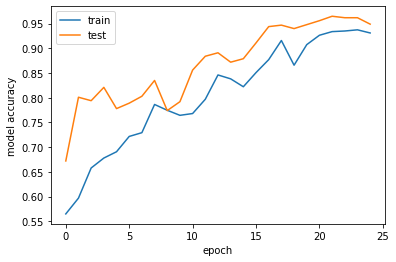

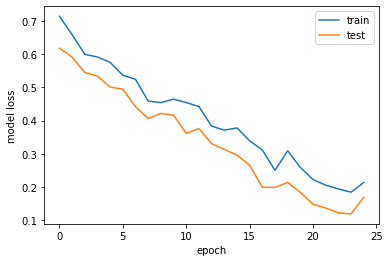

In [34]:
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()